Name: Shiska Raut <br>
ID: 1001526329

In [9]:
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

## Read training/evaluation data

**Argument(s):** 
1) filename: name of a .txt file with each line containing training/evaluation features(x) and label(y) in the following format:
((x1, x2, .....xn), y) <br>
2) dtype_x : datatype of features <br>
3) dtype_y: datatype of label <br>

**Return(s):** 'X, Y' where X is a numpy array of feature vectors and Y is the target label vector.
Note: Each column in the array(s) epresents a single datapoint.

In [10]:
def get_X_Y_arrays(filename, dtype_x, dtype_y):
    try:
        f = open(filename, 'r')
    except OSError:
        print(f'{filename} could not be opened.\n')
        sys.exit()
        
    # initialize list to store feature and labels for training data
    features = []             
    labels = []
    
    with f:
        line = f.readline()
        while line != '':
            # strip newline and outer parenthesis
            line = line.strip('\n')
            line = line.strip('( )')
            
            # extrace label and append to labels list
            single_label = line.split('), ')[-1]
            labels.append(single_label)
            
            # extrace features and append to features list
            feat = line.split('), ')[0].split(', ')
            features.append(feat)
            
            # read next line
            line = f.readline()
        
        # create dataframe of features and append labels
        X = np.array(features, dtype = dtype_x, ndmin = 2)
        
        # convert labels list to array
        Y = np.array(labels, dtype = dtype_y, ndmin = 2)
        
        return X.transpose(), Y

## Read test data

**Argument(s):** 
1) name of a .txt file with each line containing test features(x) in the following format:
(x1, x2, .....xn) <br>
2) dtype_x: datatype of features

**Return(s):** 'X' where X is a numpy array of feature vectors.
Note: Each column in the array(s) epresents a single datapoint.

In [11]:
def get_X_array(filename, dtype_x):
    try:
        f = open(filename, 'r')
    except OSError:
        print(f'{filename} could not be opened.\n')
        sys.exit()
        
    # initialize list to store feature and labels for training data
    features = []             
    
    with f:
        line = f.readline()
        while line != '':
            
            # get feature values
            line = line.strip('\n')
            line = line.strip('( )')
            feat = line.split(', ')
            features.append(feat)
            
            # read next line
            line = f.readline()
        
        # create dataframe of features and append labels
        X = np.array(features, dtype = dtype_x, ndmin = 2)
        
        return X.transpose()

# 1) Linear Regression 

### Helper Functions 

In [12]:
# k = frequency increment
# d = function depth
# given input datapoint 'x_sample', 
# returns transformed version of the intput datapoint as a numpy array
def get_feature_vector(x_sample, k, d):
    
    # stored transformed values in a list
    trans_feat_list = []
    
    # append 1 and value of 'x_sample' to the list
    trans_feat_list.append(float(1))
    trans_feat_list.append(float(x_sample))
    
    # remaining transformations will be based on 'k' and 'd'
    for i in range(1, d+1):
        val1 = (np.sin(i*k*x_sample, dtype = float)**(i*k))*np.cos(x_sample, dtype = float)
        trans_feat_list.append(val1)
        val2 = (np.cos(i*k*x_sample, dtype = float)**(i*k))*np.sin(x_sample, dtype = float)
        trans_feat_list.append(val2)
    
    # convert list into array
    x_sample_trans = np.array(trans_feat_list, dtype = float, ndmin = 2).transpose()

    # return transformed features
    return x_sample_trans


# calculates sample squared error
def get_sample_squared_error(y_sample, y_pred):
    
    # calculate and return squared error
    return np.square(y_sample - y_pred)


# get average squared error for an entire test dataset
def get_avg_squared_error(Y_pred, Y_test):

    sum_of_sq_err = np.sum((Y_pred - Y_test)**2, axis = 1)
    
    # return average over number of samples
    return sum_of_sq_err[0]/Y_pred.shape[1]


# get's prediction value for a sample
def get_prediction_value_lr(x_sample, model_params, k, d):
    
    x_sample_trans = get_feature_vector(x_sample, k, d)
    y_pred = np.dot(model_params, x_sample_trans)

    # return prediction value as a scalar
    return y_pred[0, 0]
    

## 1 a) Model Training & Prediction

In [13]:
# returns predicted values for a given test data
def get_predictions_lr(X, model_params, k, d):
    
    # save number of test samples
    n_feat, n_samples = X.shape
    
    # initialize list to store prediction values
    predictions = []
    
    for i in range(n_samples):
        y_pred = get_prediction_value_lr(X[:,i][0], model_params, k, d)
        predictions.append(y_pred)

    Y_pred = np.array(predictions, dtype = float, ndmin = 2)
        
    return Y_pred


# trains a linear regression model 
def train_model_lr(X_train, Y_train, epochs, alpha, k, d):
    
    # get number of training samples
    n_feat, n_samples = X_train.shape
    
    # get output dimension
    n_out, __ = Y_train.shape
    
    # initialize parameter vector
    model_params = np.random.uniform(-1, 1, size = (n_out, (2*d)+2))
    
    # initialize lists to store training error per epoch
    training_err_over_epochs = []
    
    # initialize list to store net change in parameter values
    change_model_params = []
    
    # do this per epoch
    for i in range(epochs): 
        
        # initialize gradient vector for each epoch
        gradient_vec = np.zeros((n_out, (2*d)+2), dtype = float)
        
        for j in range(n_samples):
            
            # pick a sample 
            x_sample = X_train[:,j]
            y_sample = Y_train[:,j]
            
            # get prediction value and adjust weights
            y_pred = get_prediction_value_lr(x_sample[0], model_params, k, d)
            x_sample = get_feature_vector(x_sample[0], k, d)
            
            # sum gradients over all training samples
            gradient_vec = gradient_vec + (y_pred - y_sample[0])*(x_sample.transpose())
        
        # adjust parameter values using batch gradient descent 
        updated_params = model_params - (alpha*gradient_vec)
        
        # get the net change in parameters
        net_change = np.sum(np.abs(model_params - updated_params))
        change_model_params.append(net_change)
            
        # set updated parameters as new parameters  
        model_params = updated_params.copy()
        
        # get preediction and error on training data
        Y_train_pred = get_predictions_lr(X_train, model_params, k, d)
        training_err_over_epochs.append(get_avg_squared_error(Y_train_pred, Y_train))    
        
    # return final parameter vector
    return model_params, training_err_over_epochs, change_model_params

### Ploting Results

In [14]:
# given model parameters and training data, plots function
def plot_function_lr(model_params, X_train, Y_train, k, d, n_values):
    
    # create domain for plotting function
    X_range = np.linspace(np.amin(X_train), np.amax(X_train)+0.1, n_values)
    
    # convert array to 1D
    X_train = X_train.squeeze()
    Y_train = Y_train.squeeze()
    
    # get function values for x domain values
    Y_pred = get_predictions_lr(X_range.reshape(1, n_values), model_params, k, d)
    Y_pred = Y_pred.squeeze()
    
    # plot function values VS actual values for training data
    fig = plt.figure(figsize = (10, 6))
    plt.plot(X_range, Y_pred, color = 'blue')
    plt.scatter(X_train, Y_train, color = 'orange')
    
    # add title, labels and legend
    plt.legend(['Function Value', 'Training Data'], loc = 2)
    title_str = f'Regression model for d = {d} and k = {k}'
    plt.title(title_str, fontdict = {'fontsize': 15})
    plt.xlabel('x', fontdict = {'fontsize': 12})
    plt.ylabel('y', fontdict = {'fontsize': 12})
    plt.grid()

    
# plots training vs test error
def plot_training_vs_test_error_lr(training_err, test_err, title_str, xlab, ylab):
    
    # plot training VS test error for given function depth(d)
    fig = plt.figure(figsize = (10, 6))
    plt.plot(training_err, color = 'orange')
    plt.plot(test_err, color = 'red')
    
    # add title, labels and legend
    plt.title(title_str, fontdict = {'fontsize': 15})
    plt.legend(['Training Error', 'Test Error'])
    plt.xlabel(xlab, fontdict = {'fontsize': 12})
    plt.ylabel(ylab, fontdict = {'fontsize': 12})
    plt.grid()

### Provide training filename, alpha, number of epochs and function depth(d)
1) filename: name of a .txt file with each line containing training/evaluation features(x) and label(y) in the following format:
((x1, x2, .....xn), y) <br>

In [15]:
'''
fname_train = str(input('Enter file containing training data: '))
alpha = float(input('Provide a learning rate(alpha): '))
epochs = int(input('Provide number of epochs: '))
d = int(input('Provide functional depth(d) value: '))

X_train, Y_train = get_X_Y_arrays(fname_train, float, float)
k = 8

# train model and print test data squared error and prediction
model_params = train_model(X_train, Y_train, epochs, alpha, k, d)

# plot prediction and actual value for training data
n_samples = X_train.shape[1]
plot_function(model_params, X_train, Y_train, k, d, n_samples)
'''

"\nfname_train = str(input('Enter file containing training data: '))\nalpha = float(input('Provide a learning rate(alpha): '))\nepochs = int(input('Provide number of epochs: '))\nd = int(input('Provide functional depth(d) value: '))\n\nX_train, Y_train = get_X_Y_arrays(fname_train, float, float)\nk = 8\n\n# train model and print test data squared error and prediction\nmodel_params = train_model(X_train, Y_train, epochs, alpha, k, d)\n\n# plot prediction and actual value for training data\nn_samples = X_train.shape[1]\nplot_function(model_params, X_train, Y_train, k, d, n_samples)\n"

## 1 b) Model Training for d = 0 to 6

In [38]:
# provide filename & get data
fname_train = "Data/1_b_c_2_train.txt"
X_train, Y_train = get_X_Y_arrays(fname_train, float, float)

# initialize hyperparameters
epochs = 1000
k = 8
alpha = 0.001
d_max = 6

# initialize list to store model parameters, training error and test error for various function depths
model_params_list = []           # stores parameters for different function depth
training_err_list = []           # stores training error throughout epochs per function depth
change_model_params_list = []    # stores net change in model parameters over epochs

# train model and get parameters and error for d = 0 to 6
for i in range(0, d_max + 1):
    model_params, training_err, change_model_params = train_model_lr(X_train, Y_train, epochs, alpha, k, i)
    model_params_list.append(model_params)
    training_err_list.append(training_err)
    change_model_params_list.append(change_model_params)
    

### Model Plotting at various function depths

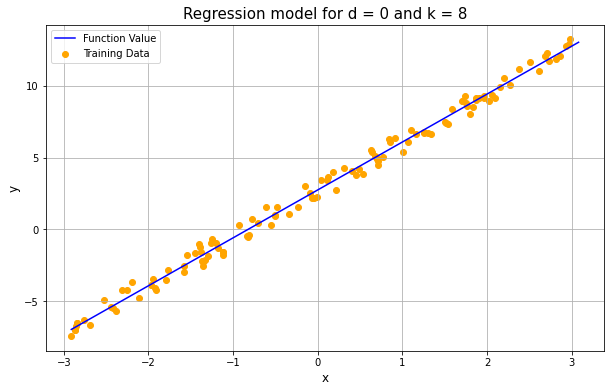

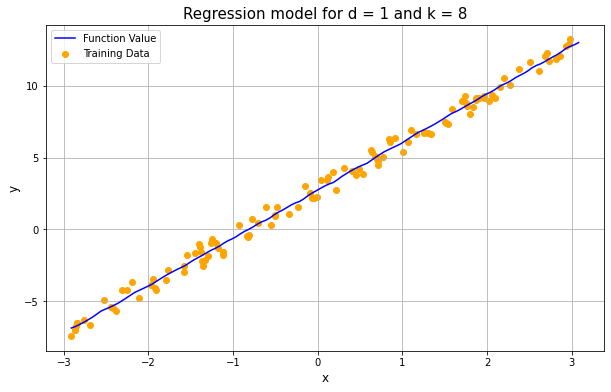

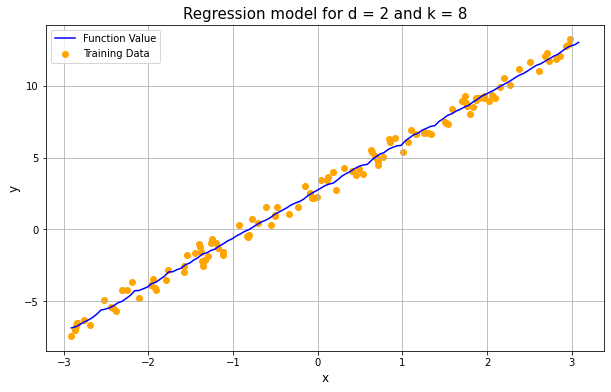

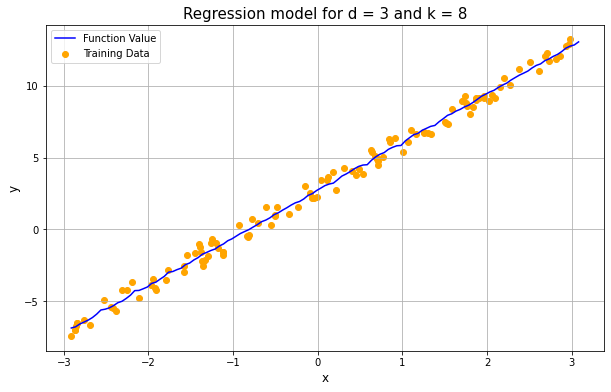

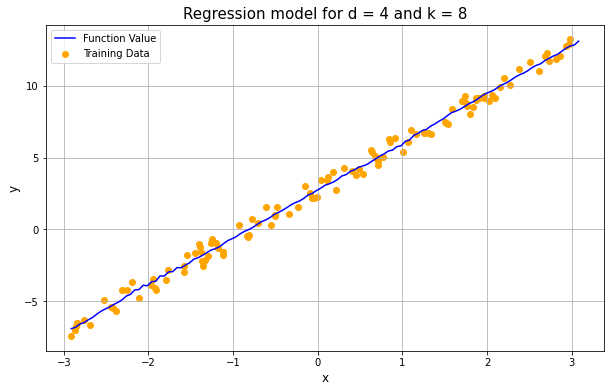

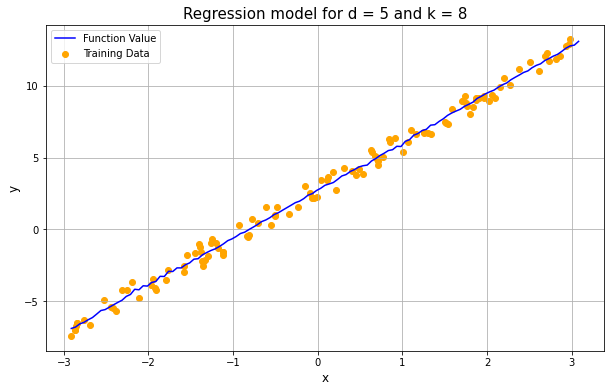

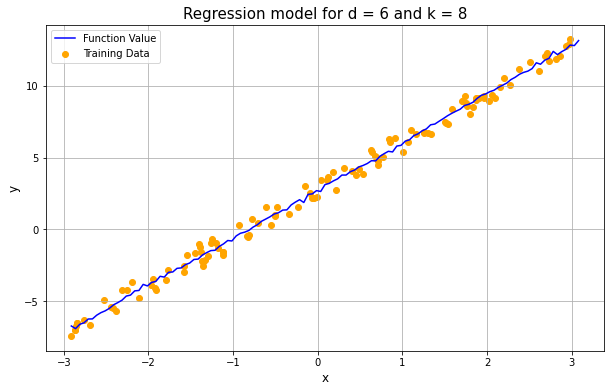

In [40]:
n_samples = X_train.shape[1]
for i in range(0, d_max+1):
    plot_function_lr(model_params_list[i], X_train, Y_train, k, i, n_samples)

### Plot change in model parameters and error 

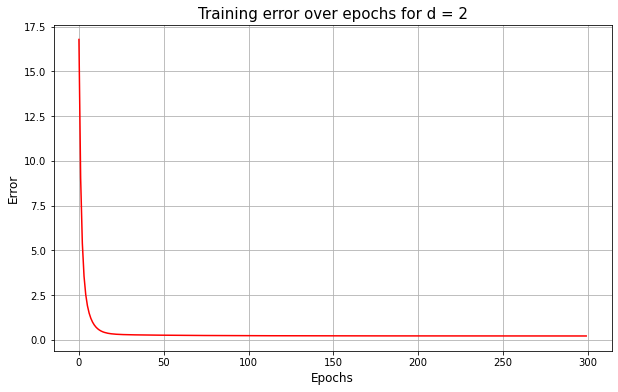

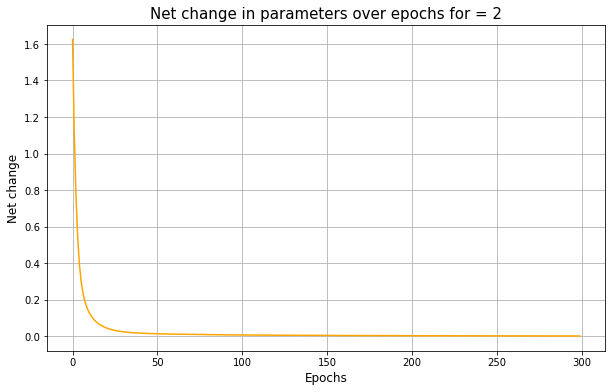

In [37]:
# pick a unctional depth
d = 2

# plot training accuracy over epochs
fig1 = plt.figure(figsize = (10,6))
plt.plot(training_err_list[d], color = 'red')
plt.xlabel('Epochs', fontdict = {'fontsize': 12})
plt.ylabel('Error', fontdict = {'fontsize': 12})
plt.title(f'Training error over epochs for d = {d}', fontdict = {'fontsize': 15})
plt.grid()

# plot change in paramteter values over epochs
fig1 = plt.figure(figsize = (10,6))
plt.plot(change_model_params_list[d], color = 'orange')
plt.xlabel('Epochs', fontdict = {'fontsize': 12})
plt.ylabel('Net change', fontdict = {'fontsize': 12})
plt.title(f'Net change in parameters over epochs for = {d}', fontdict = {'fontsize': 15})
plt.grid()

## 1 c) Model evaluation at various function depths for overfitting

In [41]:
# provide filename & get data
fname_test = "Data/1_c_test.txt"
X_test, Y_test = get_X_Y_arrays(fname_test, float, float)

# get error for test data
test_err_list = []
for i in range(0, d_max+1):
    Y_pred = get_predictions_lr(X_test, model_params_list[i], k, i)
    test_err_list.append(get_avg_squared_error(Y_pred, Y_test))
    
# get training error for last epochs
training_err_last_epoch = []
for i in range(0, d_max+1):
    Y_pred_train = get_predictions_lr(X_train, model_params_list[i], k, i)
    training_err_last_epoch.append(get_avg_squared_error(Y_pred_train, Y_train))

In [42]:
training_err_last_epoch

[0.2103239070595865,
 0.20936197624682104,
 0.2082822861479414,
 0.20811275034804486,
 0.2050958803181018,
 0.20479748572530543,
 0.19969989198140561]

### Plot training VS test error  

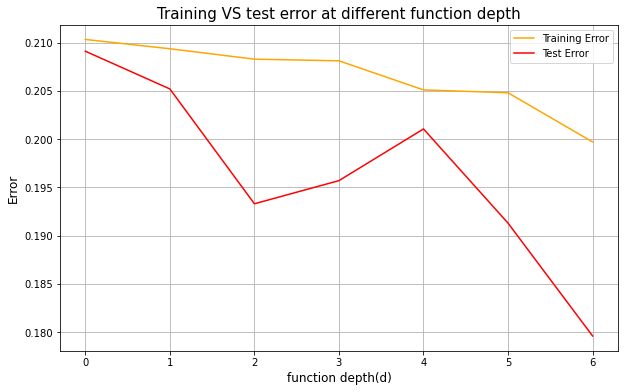

In [43]:
title = f'Training VS test error at different function depth'
plot_training_vs_test_error_lr(training_err_last_epoch, test_err_list,
                             title, 'function depth(d)', 'Error')

In [ ]:
for epoch in range(40, epochs, 20):
    plt.figure
    title = f'Training VS test error for epoch = {epoch}'
    plot_training_vs_test_error_lr(training_err_arr[epoch,:].tolist(), test_err_arr[epoch,:].tolist(),
                                 title, 'function depth(d)', 'Error')

### Conclusion: 

Overfitting might be a problem for functional depth of 3 as the error increases going from 2 to 3. From the above graph, a function depth of 2 gives the lowest error on the test data so it might be prefererable over other function depths. 
However, as the test data is of small size, it is difficult to make a strong conclusion.


# Locally Weighted Linear Regression

In [ ]:
test_err_arr.shape

# 3) Softmax Regression

### Helper Functions

#### one_hot_encoder(arr) : return encoded_arr, label_idx_dict
**arr:** <br>
[['Ceramic' 'Metal' 'Metal' 'Metal' 'Ceramic' 'Plastic' 'Plastic'
  'Plastic' 'Plastic' 'Plastic' 'Plastic' 'Ceramic']]<br>  
**encoded_arr:** <br>
[[0 1 1 1 0 0 0 0 0 0 0 0]<br>
 [0 0 0 0 0 1 1 1 1 1 1 0]<br>
 [1 0 0 0 1 0 0 0 0 0 0 1]] <br>
**label_idx_dict:** <br>
{'Metal': 0, 'Plastic': 1, 'Ceramic': 2}

In [ ]:
# given an array of attribute values for a categocial attribute,
# preforms one-hot-encoding and returns resulting binary array
def one_hot_encoder(arr):
    
    __, n_samples = arr.shape
    
    # get unique labels
    uniq_labels = set(arr[0,:].tolist())
    
    # get number of total attribute values
    n_labels = len(uniq_labels)
    
    # create an array of size n_labels*n_samples to store encoded values
    encoded_arr = np.zeros((n_labels, n_samples), dtype = int)
    
    # create dictionary to store row indev of each attribute value
    label_idx_dict = {}
    for i, v in enumerate(uniq_labels):
        label_idx_dict[v] = i
        
    # fill encoded_arr using attribute index dictionary and input arr
    for i in range(n_samples):
        # get index to encode as 1
        idx = label_idx_dict[arr[0,i]]
        encoded_arr[idx, i] = 1
        
    return encoded_arr, label_idx_dict


### Functions for Training and Prediction

In [ ]:
# given a vector of parobaility values, returns label with max probability for a single sample
def get_sample_prediction_label(sfmax_net, label_idx_dict):
    
    # get inverse of the dictionary
    inv_label_idx_dict = {v: k for k, v in label_idx_dict.items()}
    
    # return label with max probability value
    return inv_label_idx_dict[int(np.argmax(sfmax_net, axis = 0))]


# uses softmax function and parameter matrix to get probability values
# for multiclass classification
def get_sample_prediction_values(x, model_params):
    
    # initialize column vector of ones to add bias
    x_sample = np.ones((x.shape[0]+1, 1), dtype = float)
    x_sample[1::] = x.reshape(x.shape[0], 1)
    
    # calculate linear net value
    net = np.dot(model_params, x_sample)
    
    # calculate exponential value for rach class
    exp_net = np.exp(net)
    
    # calculate softmax value for each class
    sfmax_net = exp_net/np.sum(exp_net, axis = 0)
    
    return sfmax_net

# gets predictions for an entire test dataset
def get_predictions(X_test, model_params, label_idx_dict):

    # initialize list to store predictions
    Y_pred = []

    # get number of test samples
    __, n_samples = X_test.shape


    for i in range(n_samples):

        y_pred_values = get_sample_prediction_values(X_test[:,i], model_params)
        y_pred_label = get_sample_prediction_label(y_pred_values, label_idx_dict)
        Y_pred.append(y_pred_label)

    # convert labels list to numpy array
    Y_pred = np.array(Y_pred, dtype = str, ndmin = 2)

    return Y_pred  


# trains a softmax regression model given training data, alpha and number of epochs
def train_softmax_regressor(X_train, Y_train, alpha, epochs):
    
    # get number of features and samples
    n_feat, n_samples = X_train.shape
    
    # get encoded array for y
    Y_train_encoded, label_idx_dict = one_hot_encoder(Y_train)
    
    # get no of classes/labels
    n_class, __ = Y_train_encoded.shape
    
    # get paramater matrix
    model_params = np.random.randn(n_class, n_feat+1)
    
    for i in range(epochs):
        for j in range(n_samples):
            
            # pick a sample randomly
            idx = np.random.randint(0, n_samples)
            x_sample = X_train[:,idx]
            y_sample = Y_train_encoded[:,idx].reshape(Y_train_encoded.shape[0], 1)
            
            # get prediction value and adjust weights
            y_pred = get_sample_prediction_values(x_sample, model_params)

            # add bias to x_sample before calculating gradient
            x_sample_b = np.ones((x_sample.shape[0]+1, 1), dtype = float)
            x_sample_b[1::] = x_sample.reshape(x_sample.shape[0], 1)

            # calculate gradient matrix
            gradient_mtx = np.dot((y_sample - y_pred), x_sample_b.transpose())
            
            # adjust parameter values using stochastic gradient ascent
            model_params = model_params + alpha*gradient_mtx
            
    # return final parameter matrix
    return model_params, label_idx_dict

### Function for leave-one-out evaluation

In [ ]:
def leave_one_out_evaluation(X_eval, Y_eval, alpha, epochs):
    
    # get number of features and samples
    n_feat, n_samples = X_eval.shape
    
    # prediction labels generated by 'predict_class_with_knn' will be stored in this list
    Y_pred = []
    
    for i in range(n_samples):
        
        # pick test datapoint in order of the index
        x_test = X_eval[:,i]
        y_test = Y_eval[:,i]
        
        # create traiing set by deleting test datapoint
        X_train = np.delete(X_eval, i, axis = 1)
        Y_train = np.delete(Y_eval, i, axis = 1)
        
        # train model
        model_params, label_idx_dict = train_softmax_regressor(X_train, Y_train, alpha, epochs)
        
        # get test data prediction
        y_pred_values = get_sample_prediction_values(x_test, model_params)
        y_pred_label = get_sample_prediction_label(y_pred_values, label_idx_dict)
        Y_pred.append(y_pred_label)
    
    # convert prediction list to numpy array
    Y_pred = np.array(Y_pred, dtype = str, ndmin = 2)
    acc = (np.sum(Y_eval == Y_pred))/n_samples
    
    # return predictions and accuracy
    return Y_pred, acc


### Provide Filenames:
1) Training/evaluation file: name of a .txt file with each line containing training/evaluation features(x) and label(y) in the following format:
((x1, x2, .....xn), y)

2) Test file: name of a .txt file with each line containing test features(x) in the following format:
(x1, x2, .....xn)

In [ ]:
'''
fname_train = str(input('Enter file containing training data: '))
fname_test = str(input('Enter file containing test data: '))
fname_eval = str(input('Enter file containing leave_one_out evaluation data: '))
alpha = float(input('Provide a learning rate(alpha): '))
epochs = int(input('Provide number of epochs: '))
'''
fname_train = '3_train.txt'
fname_test = '3_test.txt'
fname_eval = '3_eval.txt'
epochs = 3

X_train, Y_train = get_X_Y_arrays(fname_train)
X_test = get_X_array(fname_test)
X_eval, Y_eval = get_X_Y_arrays(fname_eval)

### b) Model Evaluation

**alpha = 0.00001, 0.00001, 0.0001 and 0.001**

In [ ]:
Y_pred, acc = leave_one_out_evaluation(X_eval, Y_eval, 0.00001, 1)    

In [ ]:
acc

### c) Evaluation after removing 4th attribute

In [ ]:
X_eval_3 = np.delete(X_eval, 3, axis = 0)

In [ ]:
X_eval_3[:,0]

In [ ]:
Y_pred, acc = leave_one_out_evaluation(X_eval_3, Y_eval, 0.00001, 5)    

In [ ]:
acc

In [ ]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x

In [ ]:
x1 = x[0,0]
x1

In [ ]:
x1 = 9

In [ ]:
x

In [ ]:
model_params = np.ones((3, 3+1))
model_params

In [ ]:
model_params[:,1::] = np.random.randn(3, 3)
model_params

In [ ]:
for d in range(0, 7):
    print(d)